<a href="https://colab.research.google.com/github/Omkar-Kaos/C.V.-Experiments/blob/main/C_V_EXPERIMENT_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Operations

In [ ]:
# Convert to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

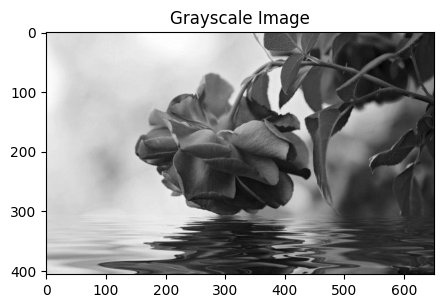

In [ ]:
# Display Grayscale Image
plt.figure(figsize=(5, 5))
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('on')
plt.show()

In [ ]:
# Negate the grayscale image
negated_img = 255 - gray_img

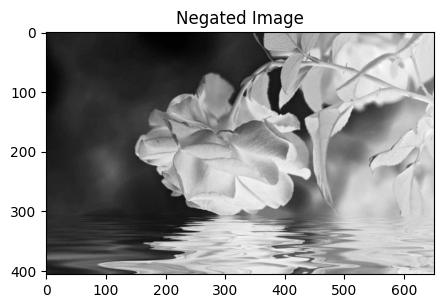

In [ ]:
# Display Negated Image
plt.figure(figsize=(5, 5))
plt.imshow(negated_img, cmap='gray')
plt.title('Negated Image')
plt.axis('on')
plt.show()

In [ ]:
# Display the 2D array of the grayscale image
print(gray_img)

[[232 232 230 ...  46  44  44]
 [233 232 230 ...  46  45  45]
 [233 232 230 ...  46  46  46]
 ...
 [218 218 219 ...  52  51  51]
 [221 221 222 ...  47  43  43]
 [221 222 222 ...  34  37  37]]


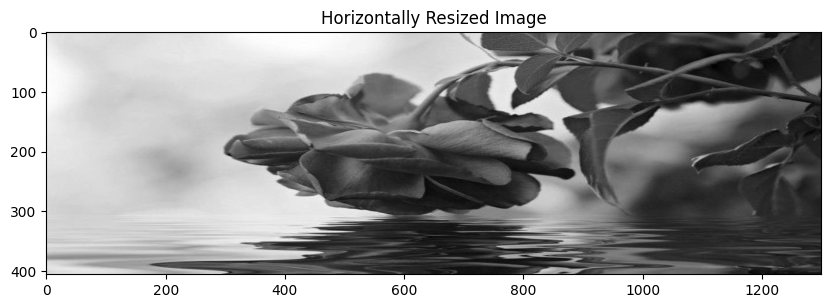

In [ ]:
# Resize - Horizontal
resized_horizontal = cv2.resize(gray_img, (gray_img.shape[1] * 2, gray_img.shape[0]))  # Double width, keep original height

# Display Resized Horizontal Image
plt.figure(figsize=(10, 5))  # Adjust figure size for wider image
plt.imshow(resized_horizontal, cmap='gray')
plt.title('Horizontally Resized Image')
plt.axis('on')
plt.show()

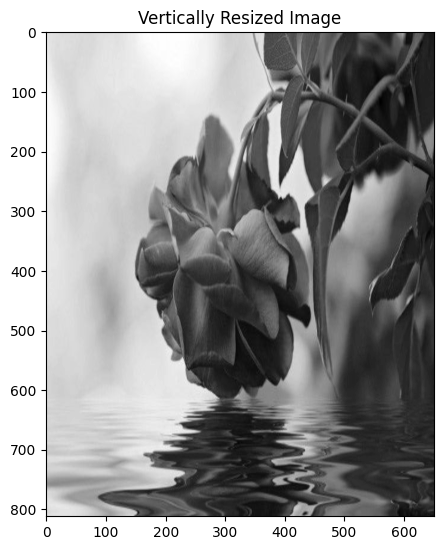

In [ ]:
# Resize - Vertical
resized_vertical = cv2.resize(gray_img, (gray_img.shape[1], gray_img.shape[0] * 2))  # Keep original width, double height

# Display Resized Vertical Image
plt.figure(figsize=(5, 10))  # Adjust figure size for taller image
plt.imshow(resized_vertical, cmap='gray')
plt.title('Vertically Resized Image')
plt.axis('on')
plt.show()

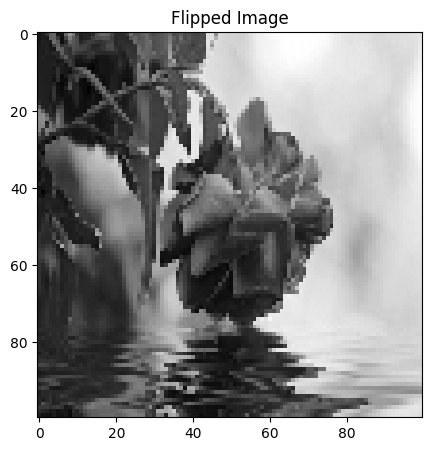

In [ ]:
# Display Flipped Image
plt.figure(figsize=(5, 5))
plt.imshow(flipped_img, cmap='gray')
plt.title('Flipped Image')
plt.axis('on')
plt.show()

Synthetic Image



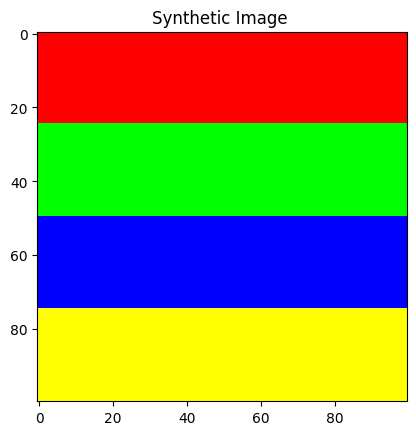

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions
width = 100
height = 100

# Create a blank image (3 channels for RGB)
synthetic_image = np.zeros((height, width, 3), dtype=np.uint8)

# Define colors for each row (RGB values)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow

# Fill each row with a different color
row_height = height // 4  # Calculate height of each row

for i in range(4):
    start_row = i * row_height
    end_row = (i + 1) * row_height
    synthetic_image[start_row:end_row, :, :] = colors[i]  # Assign color to row

# Display the image
plt.imshow(synthetic_image)
plt.title('Synthetic Image ')
plt.show()

In [ ]:
# Convert the synthetic image to grayscale
gray_image = np.dot(synthetic_image[...,:3], [0.299, 0.587, 0.114])

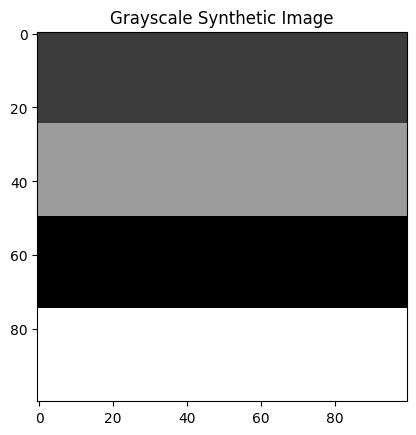

In [ ]:
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Synthetic Image')
plt.show()


Arithmetic Operations

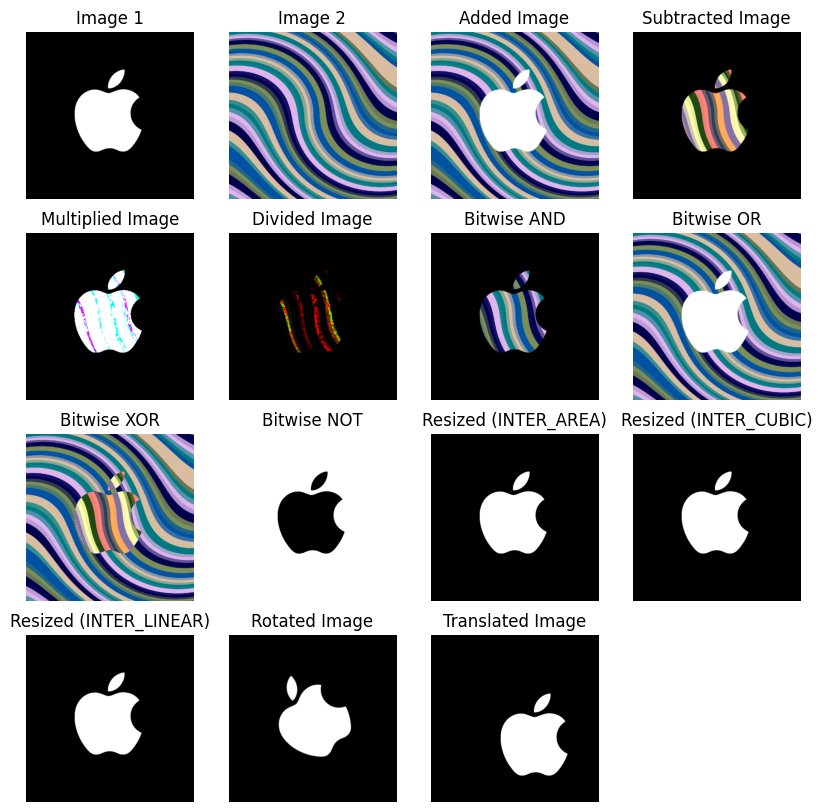

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display the images
def display_images(images, titles, cols=3):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load two sample images (ensure both images are of the same size)
img1 = cv2.imread('/content/img1.png')
img2 = cv2.imread('/content/img2.webp')

# Resize images to ensure both have the same size
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# --- A. Arithmetic Operations ---
# 1. Addition of Images
added_image = cv2.add(img1, img2)

# 2. Subtraction of Images
subtracted_image = cv2.subtract(img1, img2)

# 3. Multiplication of Images (Masking example)
multiplied_image = cv2.multiply(img1, img2)

# 4. Division of Images (Decrease brightness)
divided_image = cv2.divide(img1, img2)

# --- B. Logical Operations ---
# Bitwise AND
bitwise_and = cv2.bitwise_and(img1, img2)

# Bitwise OR
bitwise_or = cv2.bitwise_or(img1, img2)

# Bitwise XOR
bitwise_xor = cv2.bitwise_xor(img1, img2)

# Bitwise NOT (on img1)
bitwise_not = cv2.bitwise_not(img1)

# --- C. Resize Images ---
# Resize using different interpolation methods
resized_image_area = cv2.resize(img1, (400, 400), interpolation=cv2.INTER_AREA)
resized_image_cubic = cv2.resize(img1, (400, 400), interpolation=cv2.INTER_CUBIC)
resized_image_linear = cv2.resize(img1, (400, 400), interpolation=cv2.INTER_LINEAR)

# --- D. Rotation and Translation ---
# Rotate the image (45 degrees)
center = (img1.shape[1] // 2, img1.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated_image = cv2.warpAffine(img1, rotation_matrix, (img1.shape[1], img1.shape[0]))

# Translate the image (shift by 50 pixels on x and y axes)
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])
translated_image = cv2.warpAffine(img1, translation_matrix, (img1.shape[1], img1.shape[0]))

# --- Displaying Results ---
images_to_show = [
    img1, img2, added_image, subtracted_image, multiplied_image, divided_image,
    bitwise_and, bitwise_or, bitwise_xor, bitwise_not,
    resized_image_area, resized_image_cubic, resized_image_linear,
    rotated_image, translated_image
]

titles = [
    'Image 1', 'Image 2', 'Added Image', 'Subtracted Image', 'Multiplied Image', 'Divided Image',
    'Bitwise AND', 'Bitwise OR', 'Bitwise XOR', 'Bitwise NOT',
    'Resized (INTER_AREA)', 'Resized (INTER_CUBIC)', 'Resized (INTER_LINEAR)',
    'Rotated Image', 'Translated Image'
]

# Display all the images
display_images(images_to_show, titles, cols=4)



In [ ]:
!pip install opencv-python matplotlib

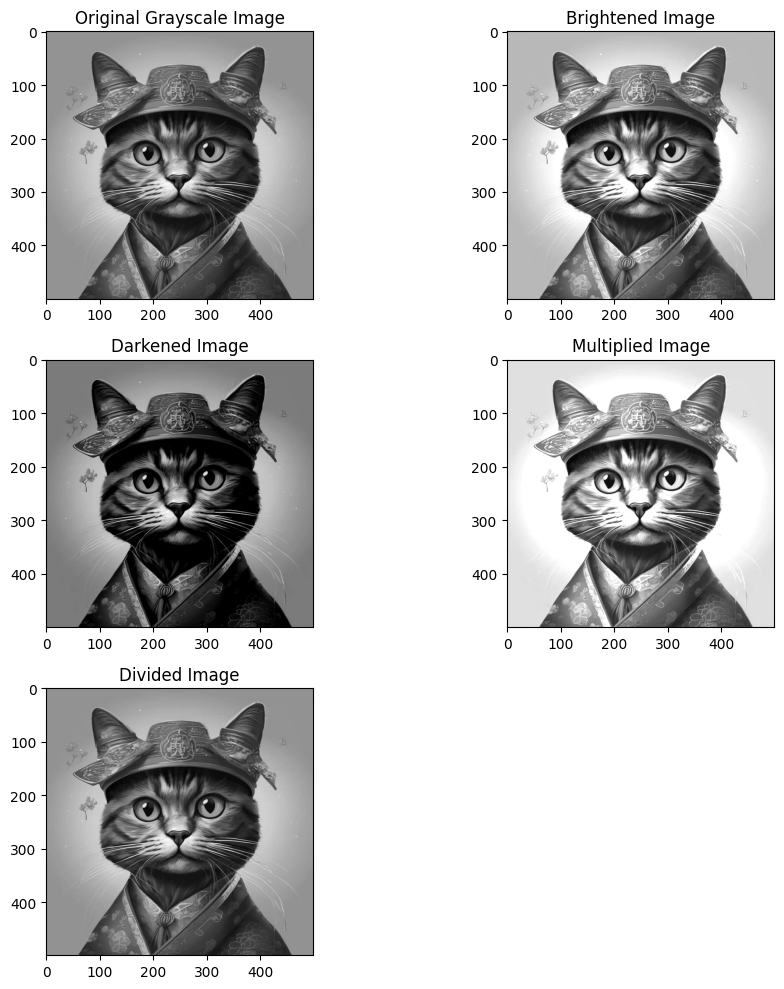

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread("/content/img 3.webp")  # Replace with the path to your image

if image is None:
    print("Error: Image not found!")
    exit()

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Arithmetic operations
brightened_image = cv2.add(gray_image, np.array([50], dtype=np.uint8))  # Increase brightness
darkened_image = cv2.subtract(gray_image, np.array([50], dtype=np.uint8))  # Decrease brightness
multiplied_image = cv2.multiply(gray_image, 1.5)  # Multiply pixel values by 1.5
divided_image = cv2.divide(gray_image, 2)  # Divide pixel values by 2

# Display the results using matplotlib with titles and axes
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('on')

# Brightened image
plt.subplot(3, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title('Brightened Image')
plt.axis('on')

# Darkened image
plt.subplot(3, 2, 3)
plt.imshow(darkened_image, cmap='gray')
plt.title('Darkened Image')
plt.axis('on')

# Multiplied image
plt.subplot(3, 2, 4)
plt.imshow(multiplied_image, cmap='gray')
plt.title('Multiplied Image')
plt.axis('on')

# Divided image
plt.subplot(3, 2, 5)
plt.imshow(divided_image, cmap='gray')
plt.title('Divided Image')
plt.axis('on')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



Distance Measures

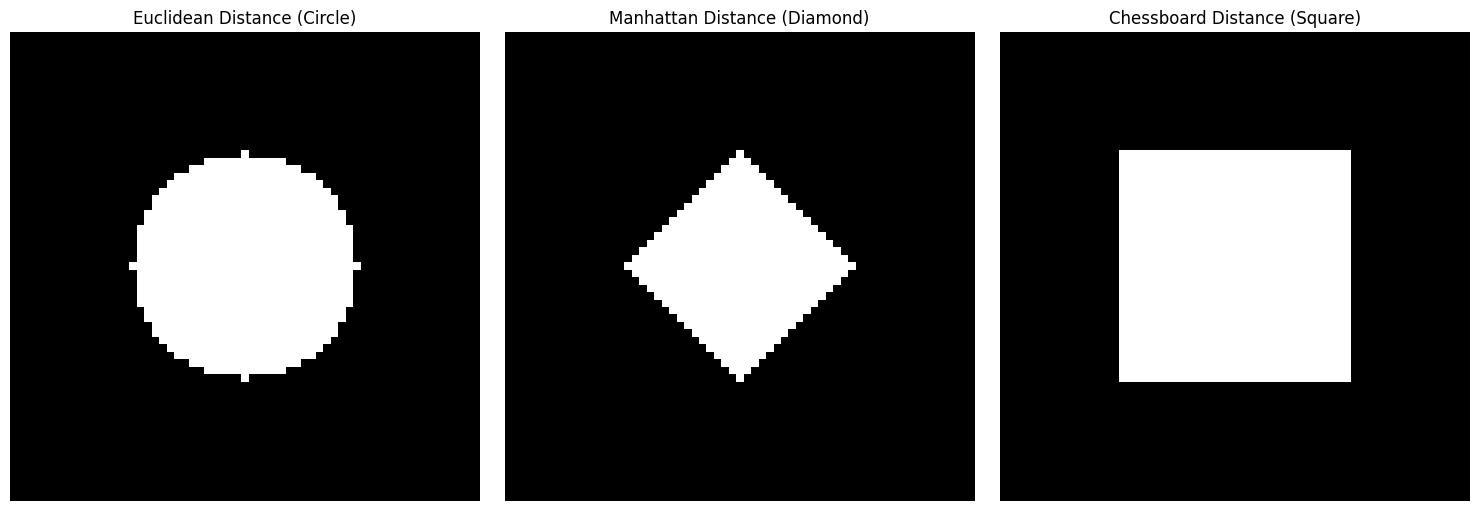

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a solid Euclidean distance (circle)
def euclidean_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            if dist <= max_distance:
                img[y, x] = (255, 255, 255)  # Inside the circle, set to white
            else:
                img[y, x] = (0, 0, 0)  # Outside the circle, set to black
    return img

# Function to generate a solid Manhattan distance (diamond)
def manhattan_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = abs(x - center[0]) + abs(y - center[1])
            if dist <= max_distance:
                img[y, x] = (255, 255, 255)  # Inside the diamond, set to white
            else:
                img[y, x] = (0, 0, 0)  # Outside the diamond, set to black
    return img

# Function to generate a solid Chessboard distance (square)
def chessboard_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = max(abs(x - center[0]), abs(y - center[1]))
            if dist <= max_distance:
                img[y, x] = (255, 255, 255)  # Inside the square, set to white
            else:
                img[y, x] = (0, 0, 0)  # Outside the square, set to black
    return img

# Set up parameters for the grid
height, width = 63, 63
center = (width // 2, height // 2)  # center of the image
max_distance = min(center) // 2  # Max distance will be half of the smaller dimension

# Create blank images for each distance
euclidean_img = np.ones((height, width, 3), dtype=np.uint8) * 0  # black background
manhattan_img = np.ones((height, width, 3), dtype=np.uint8) * 0  # black background
chessboard_img = np.ones((height, width, 3), dtype=np.uint8) * 0  # black background

# Generate solid distance figures
euclidean_img = euclidean_distance(euclidean_img, center, max_distance)
manhattan_img = manhattan_distance(manhattan_img, center, max_distance)
chessboard_img = chessboard_distance(chessboard_img, center, max_distance)

# Plot using Matplotlib with horizontal alignment
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for side-by-side

# Show the images in the axes
axes[0].imshow(cv2.cvtColor(euclidean_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Euclidean Distance (Circle)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(manhattan_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Manhattan Distance (Diamond)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(chessboard_img, cv2.COLOR_BGR2RGB))
axes[2].set_title('Chessboard Distance (Square)')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


Patterns

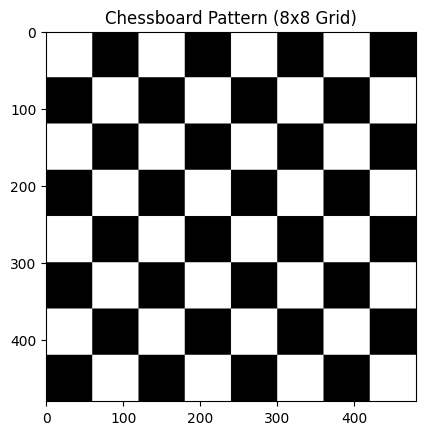

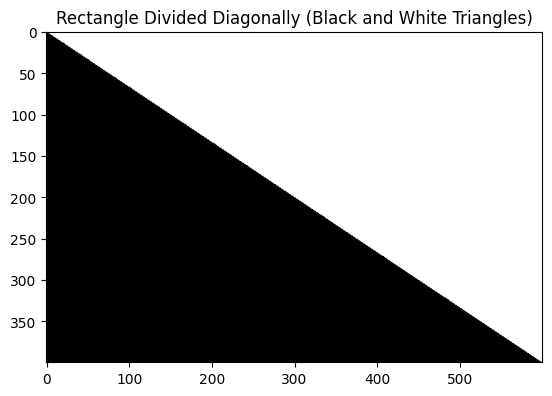

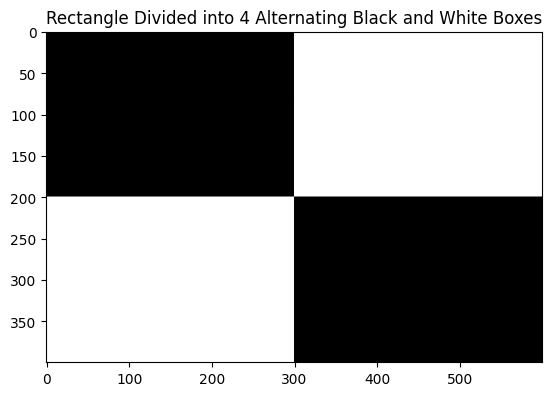

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Chessboard Pattern (8x8 Grid)
board_size = 8
square_size = 60
width = height = board_size * square_size

# Create a blank image with white background
img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Loop to create alternating black and white squares
for row in range(board_size):
    for col in range(board_size):
        if (row + col) % 2 == 0:
            img[row * square_size: (row + 1) * square_size, col * square_size: (col + 1) * square_size] = (255, 255, 255)
        else:
            img[row * square_size: (row + 1) * square_size, col * square_size: (col + 1) * square_size] = (0, 0, 0)

# Convert to RGB for proper color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.title("Chessboard Pattern (8x8 Grid)")
plt.axis('on')
plt.show()

# 2. Rectangle Divided Diagonally (Black and White Triangles)
height, width = 400, 600  # Height and width of the rectangle

# Create a blank image with white background
img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background

# Define the diagonal line (from top-left to bottom-right)
for i in range(height):
    for j in range(width):
        if j < (i / height) * width:  # Condition for the left triangle (black)
            img[i, j] = [0, 0, 0]  # Black color

# Convert to RGB for proper color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.title("Rectangle Divided Diagonally (Black and White Triangles)")
plt.axis('on')
plt.show()

# 3. Rectangle Divided into 4 Alternating Black and White Boxes
height, width = 400, 600  # Rectangle size (height, width)
row_division, col_division = 2, 2  # Divide into 2 rows and 2 columns
box_height, box_width = height // row_division, width // col_division  # Size of each box

# Create a blank image with white background
img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background

# Create alternating black and white boxes
for i in range(row_division):
    for j in range(col_division):
        if (i + j) % 2 == 0:
            # Fill alternating boxes with black color
            img[i * box_height:(i + 1) * box_height, j * box_width:(j + 1) * box_width] = [0, 0, 0]

# Convert to RGB for proper color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.title("Rectangle Divided into 4 Alternating Black and White Boxes")
plt.axis('on')
plt.show()


Geometric Transformations

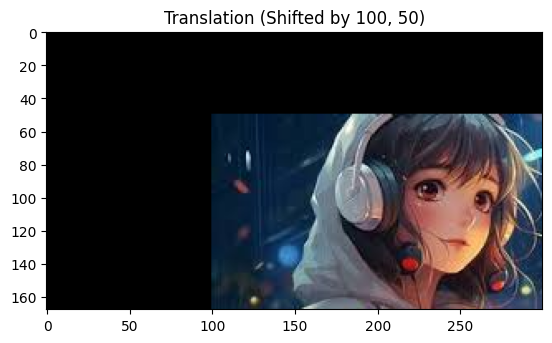

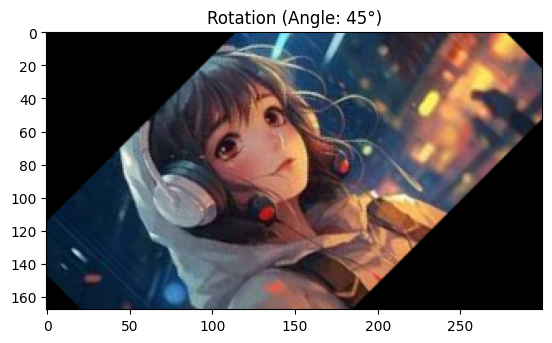

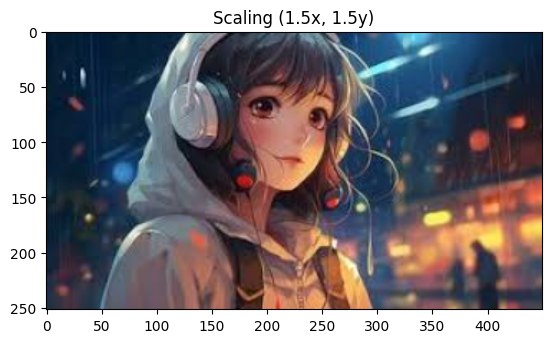

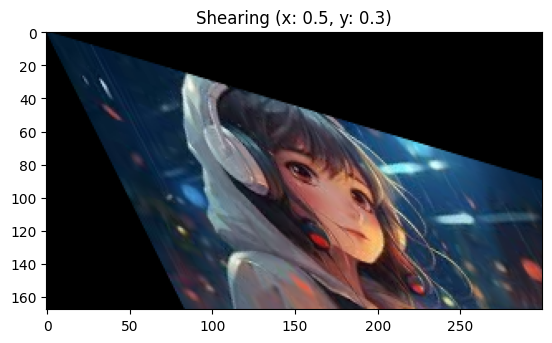

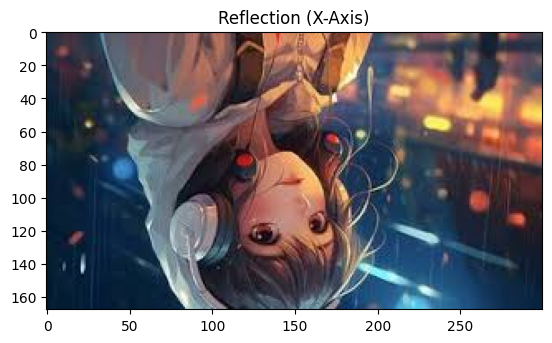

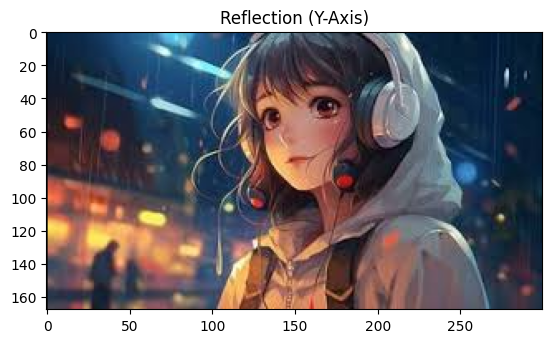

In [ ]:
#geometric transformation
# Geometric Transformations with Titles and Axes
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/girl.jpg")  # Replace with your image path
if image is None:
    print("Error: Image not found!")
    exit()

# Convert BGR (OpenCV) to RGB (Matplotlib)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(img, title):
    """Display image with a title and axis."""
    plt.imshow(img)
    plt.title(title)
    plt.axis("on")  # Turn on the axis
    plt.show()

# --- 1. Translation ---
def translate(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

translated_image = translate(image, 100, 50)
show_image(translated_image, "Translation (Shifted by 100, 50)")

# --- 2. Rotation ---
def rotate(image, angle, center=None, scale=1.0):
    (height, width) = image.shape[:2]
    if center is None:
        center = (width // 2, height // 2)

    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

rotated_image = rotate(image, 45)
show_image(rotated_image, "Rotation (Angle: 45°)")

# --- 3. Scaling ---
def scale(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale(image, 1.5, 1.5)
show_image(scaled_image, "Scaling (1.5x, 1.5y)")


# --- 6. Shearing Transformation ---
def shear(image, shear_x, shear_y):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows))
    return sheared_image

sheared_image = shear(image, 0.5, 0.3)
show_image(sheared_image, "Shearing (x: 0.5, y: 0.3)")

# --- 7. Reflection Transformation ---
def reflect(image, axis):
    rows, cols = image.shape[:2]

    # Create transformation matrices for reflection
    if axis == 'x-axis':  # Reflect along the x-axis
        reflection_matrix = np.float32([[1, 0, 0], [0, -1, rows]])
    elif axis == 'y-axis':  # Reflect along the y-axis
        reflection_matrix = np.float32([[-1, 0, cols], [0, 1, 0]])
    else:
        raise ValueError("Invalid axis. Choose either 'x-axis' or 'y-axis'.")

    # Apply the warpAffine transformation
    reflected_image = cv2.warpAffine(image, reflection_matrix, (cols, rows))
    return reflected_image

# Reflect along the x-axis
reflected_image_x_axis = reflect(image, 'x-axis')
show_image(reflected_image_x_axis, "Reflection (X-Axis)")

# Reflect along the y-axis
reflected_image_y_axis = reflect(image, 'y-axis')
show_image(reflected_image_y_axis, "Reflection (Y-Axis)")




Original Image 3 (digit '3'):


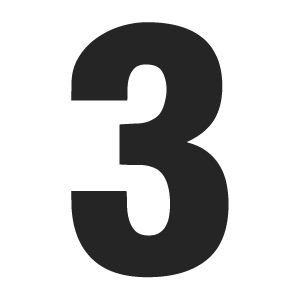

Original Image 1 (digit '1'):


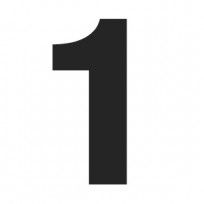

Image combined and saved as 31.jpg
Combined Image (31):


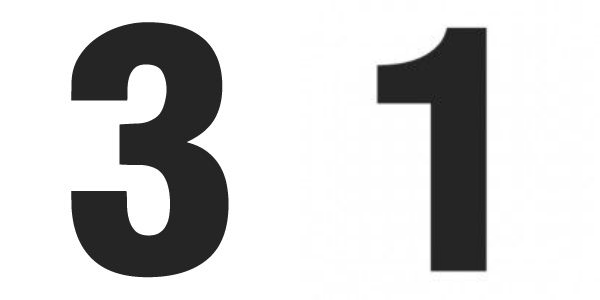

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Function to resize both images to the same size
def resize_images_to_same_size(image1, image2):
    # Resize image2 to the same size as image1
    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
    return image2_resized

# Function to combine the images into a two-digit number with no gap
def combine_images_no_gap(image1, image2):
    # Resize image2 to the same size as image1
    image2_resized = resize_images_to_same_size(image1, image2)

    # Create an output image with width = sum of both images' widths and height = height of the image
    output_image = np.zeros((image1.shape[0], image1.shape[1] + image2_resized.shape[1], 3), dtype=np.uint8)

    # Place image1 (digit "3") on the left side of the output
    output_image[:, :image1.shape[1]] = image1

    # Place image2 (digit "1") on the right side of the output, without gap
    output_image[:, image1.shape[1]:] = image2_resized

    return output_image

# Load the two images (3.jpg and 1.jpg)
image3 = cv2.imread('/content/3image.jpg')
image1 = cv2.imread('/content/1image.jpg')

# Check if images are loaded properly
if image3 is None or image1 is None:
    print("Error: One or both images are not found.")
else:
    # Display original images
    print("Original Image 3 (digit '3'):")
    cv2_imshow(image3)

    print("Original Image 1 (digit '1'):")
    cv2_imshow(image1)

    # Combine the images with no gap
    combined_image = combine_images_no_gap(image3, image1)

    # Save the combined image as 31.jpg
    cv2.imwrite('31.jpg', combined_image)
    print("Image combined and saved as 31.jpg")

    # Optionally display the combined image
    print("Combined Image (31):")
    cv2_imshow(combined_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()




